<a href="https://colab.research.google.com/github/dp4116/My-Project/blob/main/2nd_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependecies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


Data Processing

In [ ]:
dataset = pd.read_csv('/content/heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.shape

(1025, 14)

In [ ]:
# getting some info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#checking for missing values in data set
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures about the data
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Testing codes

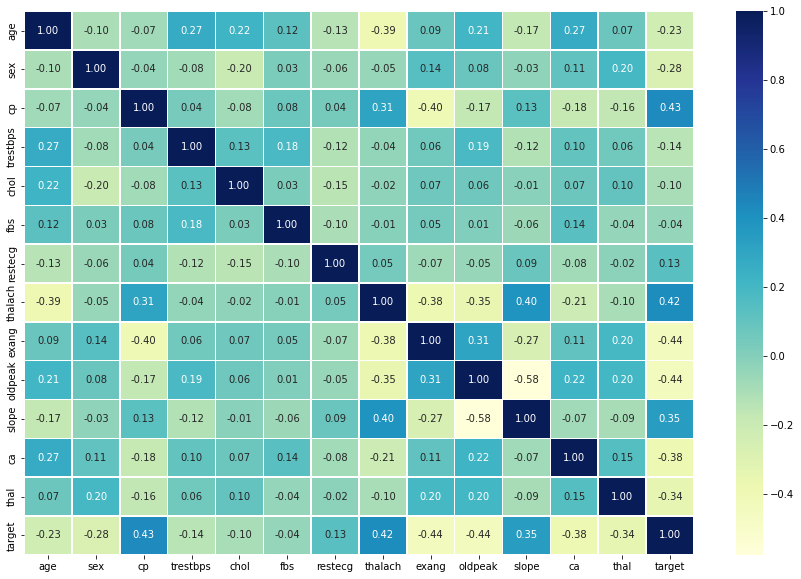

In [ ]:
corr_matrix = dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


Analysing Target feature

1    526
0    499
Name: target, dtype: int64


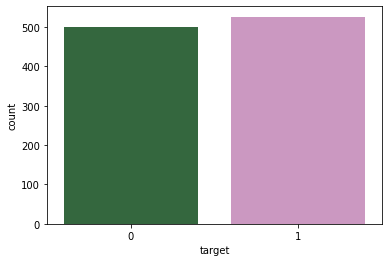

In [ ]:
ax = sns.countplot(dataset["target"],palette ="cubehelix" )
target_temp = dataset.target.value_counts()
print(target_temp)

In [ ]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 164.69
Percentage of patients with heart problems: 173.6


Analysing Sex feature

In [ ]:
dataset["sex"].unique()

array([1, 0])

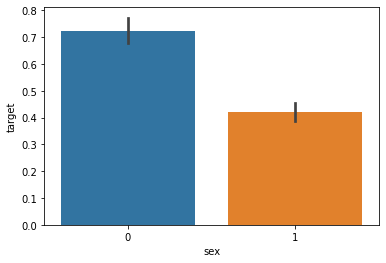

In [ ]:
sns.barplot(dataset["sex"],dataset["target"])

Analysing Chest Pain feature

In [ ]:
dataset["cp"].unique()

array([0, 1, 2, 3])

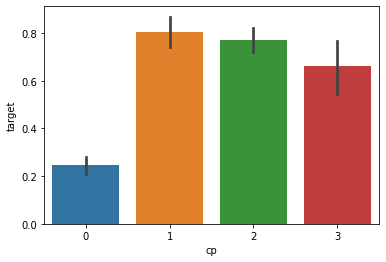

In [ ]:
sns.barplot(dataset["cp"],dataset["target"])

Analysing the FBS feature 

In [ ]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

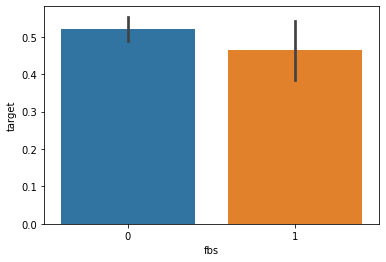

In [ ]:
sns.barplot(dataset["fbs"],dataset["target"])

Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

array([1, 0, 2])

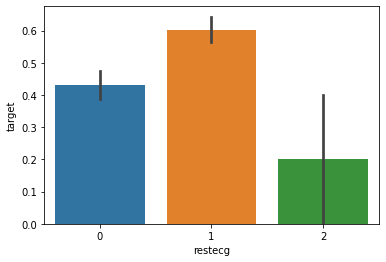

In [ ]:
sns.barplot(dataset["restecg"],dataset["target"])

Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

array([0, 1])

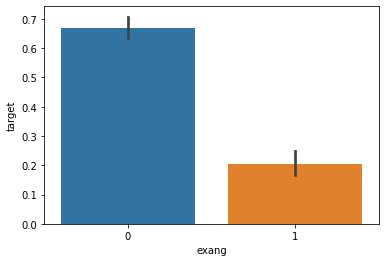

In [ ]:
sns.barplot(dataset["exang"],dataset["target"])

Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

array([2, 0, 1])

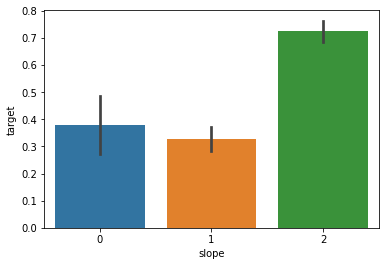

In [ ]:
sns.barplot(dataset["slope"],dataset["target"])

Analysing the 'ca' feature

In [ ]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

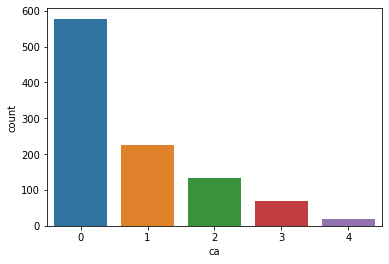

In [ ]:
sns.countplot(dataset["ca"])

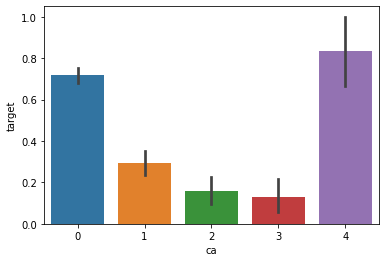

In [ ]:
sns.barplot(dataset["ca"],dataset["target"])

Analysing thal feature

In [ ]:
dataset["thal"].unique()

array([3, 2, 1, 0])

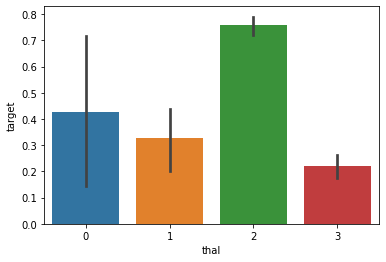

In [ ]:
sns.barplot(dataset["thal"],dataset["target"])

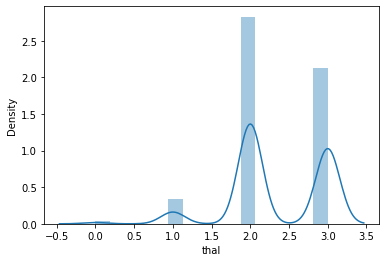

In [ ]:
sns.distplot(dataset["thal"])

#Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape);

(820, 13) (205, 13) (820,) (205,)


#Model Training

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(205,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(205,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(205,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(205,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(205,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(205,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(205,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 97.56 %


Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Using TensorFlow backend.
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 1ms/step - loss: 45.6397 - accuracy: 0.4890
Epoch 2/300
26/26 [==============================] - 0s 1ms/step - loss: 28.7338 - accuracy: 0.4890
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 13.1830 - accuracy: 0.4854
Epoch 4/300
26/26 [==============================] - 0s 1ms/step - loss: 4.0835 - accuracy: 0.3427
Epoch 5/300
26/26 [==============================] - 0s 1ms/step - loss: 3.4141 - accuracy: 0.3293
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 3.1018 - accuracy: 0.3244
Epoch 7/300
26/26 [==============================] - 0s 1ms/step - loss: 2.7983 - accuracy: 0.3439
Epoch 8/300
26/26 [==============================] - 0s 2ms/step - loss: 2.5256 - accuracy: 0.3354
Epoch 9/300
26/26 [==============================] - 0s 1ms/step - loss: 2.2052 - accuracy: 0.3293
Epoch 10/300
26/26 [==============================] - 0s 1ms/step - loss: 1.8896 - accuracy: 0.3378
Epoch 

##Accuracy Comperision

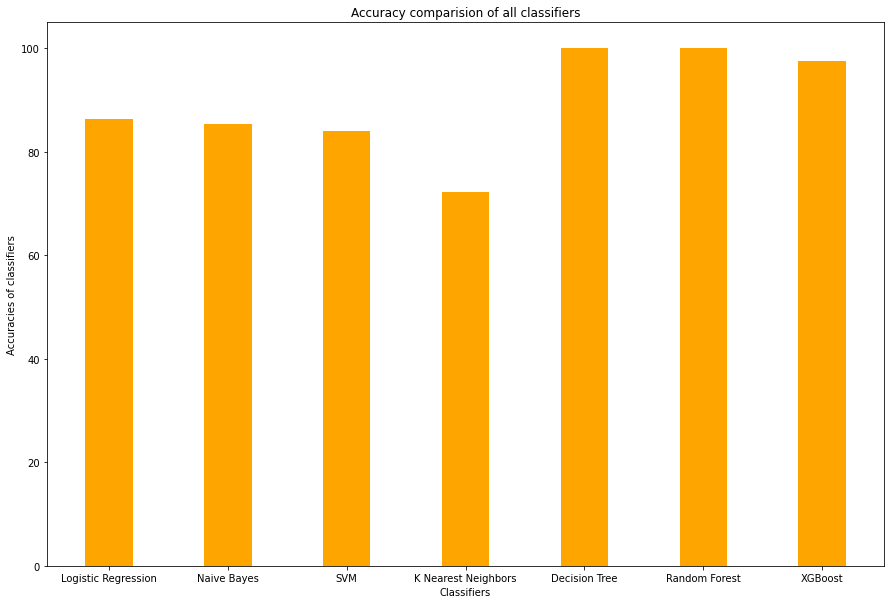

In [ ]:
accuracy_scores = {'Logistic Regression':score_lr,'Naive Bayes':score_nb,'SVM':score_svm,'K Nearest Neighbors':score_knn,'Decision Tree':score_dt,'Random Forest':score_rf,'XGBoost':score_xgb}
classifiers = list(accuracy_scores.keys())
Accuracy = list(accuracy_scores.values())

fig = plt.figure(figsize = (15,10))

plt.bar(classifiers,Accuracy,color = 'orange', width=0.4)

plt.xlabel("Classifiers")
plt.ylabel("Accuracies of classifiers")
plt.title("Accuracy comparision of all classifiers")
plt.show()



#Prediction Section

Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predictingg for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction_ans = model.predict(input_data_reshaped)
print(prediction_ans)

if(prediction_ans[0]==0):
  print('Tht Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')
    


[[0.04623821]]
The Person has Heart Disease
